# In this lab, we will use PCA to "recreate" similar facial structures

- With the rise in facial recognition and image recognition, this material is especially timely

### Remember the theme: PCA as "compression" or "structure" of an image

In [1]:
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import numpy as np
%matplotlib inline

In [2]:
# setup the data
n_row, n_col = 3, 3
n_pictures = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

In [3]:
# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering - we do this to balance all of the faces across rows
# think of centering as "stabilizing" the pixels
faces_centered = faces - faces.mean(axis=0)

# local centering - we do this to balance all of the faces across columns
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of {} faces").format(n_samples)

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /Users/mason/scikit_learn_data
Dataset consists of 400 faces


# Make sure we understand pixels

Assume pixels are on a range of [0,255]

This represents [8 bit color](https://en.wikipedia.org/wiki/8-bit_color)

We will only use grayscale for today to make the example easier to understand and use.

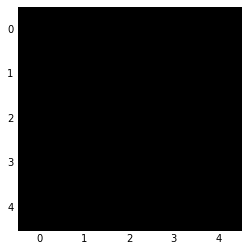

In [4]:
plt.imshow(np.ones((5,5))*0, cmap=plt.cm.gray, vmin=0, vmax=255)

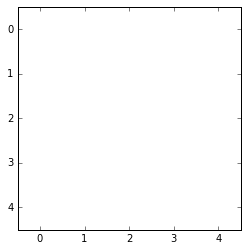

In [5]:
plt.imshow(np.ones((5,5))*255, cmap=plt.cm.gray, vmin=0, vmax=255)

What's happening in the 2 examples above? What changed? Why?

In [6]:
# your answer here

# Creating our face plots

In [7]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

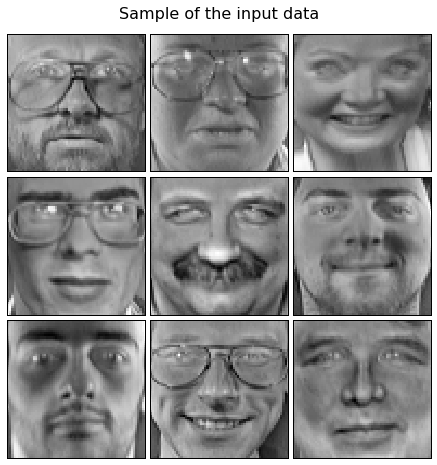

In [8]:
plot_gallery("Sample of the input data", faces_centered[:n_pictures], 3, 3)

# Now we will use PCA to "recreate" the faces

- This can be thought of as a form of image similarity
- Similar to tools used in Photoshop (I believe it's the lasso tool, but don't quote me on that)
- Many applications in crime, biology, pattern recognition

In [9]:
faces_centered

array([[ 0.27765974,  0.21050064,  0.1808518 , ..., -0.22626604,
        -0.22262967, -0.22770201],
       [ 0.41331112,  0.36681321,  0.31237099, ...,  0.20690602,
         0.35930276,  0.38728827],
       [ 0.0167652 , -0.0421294 , -0.06351379, ...,  0.43019482,
         0.41317004,  0.28413075],
       ..., 
       [ 0.12508598,  0.13643926,  0.14811277, ..., -0.17636046,
        -0.13966623, -0.1488708 ],
       [ 0.08992872,  0.0558275 ,  0.02617866, ...,  0.11492857,
         0.09377155,  0.09696367],
       [-0.06032472, -0.12335157, -0.19019049, ..., -0.00639924,
        -0.10193643, -0.06981868]], dtype=float32)

In [10]:
faces_centered.shape

(400, 4096)

# Why 4096 features/columns?

Read the documentation for the dataset [here](http://scikit-learn.org/stable/datasets/olivetti_faces.html)

In [11]:
# your answer here

# Do we need to standardize features?

In [12]:
# your answer here

# Create PCA model

In [13]:
pca = PCA(n_components=9, whiten=True)
pca.fit(faces_centered)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

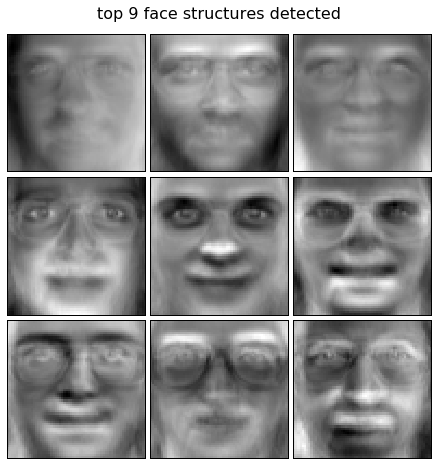

In [14]:
# pay special attention to the last 2 arguments
# their product must equal n_components from pca
plot_gallery('top 9 face structures detected', pca.components_[:n_pictures], 3, 3)

In [15]:
# each pca component has length 4096
pca.components_[0].shape

(4096,)

# What do each of the components represent?

In [16]:
# your answer here

# Examining explained variance

In [17]:
pca.explained_variance_ratio_

array([ 0.18154667,  0.10176542,  0.0710416 ,  0.05596606,  0.04068939,
        0.03342148,  0.02613544,  0.02586309,  0.02152116])

Interpret the above line of code in your own words:

In [18]:
# your answer here

# Choosing n_components

Plot all 400 samples and use the elbow method to determine the amount of n_components. It's okay to eyeball the number.

In [19]:
# your answer here

# Plot your top n_components to see what the faces look like

In [20]:
# your answer here

# Take a stab at interpreting the results. What did PCA learn?

In [21]:
# your answer here